In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_excel("SuperStore.xlsx")

In [9]:
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [10]:
data.shape

(1952, 25)

In [11]:
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [12]:
data['Product Base Margin'] = data['Product Base Margin'].fillna(data['Product Base Margin'].mean())

In [14]:
data.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

## Order Priority

In [15]:
data['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: count, dtype: int64

In [18]:
data['Order Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low'], dtype=object)

In [19]:
data['Order Priority']=data['Order Priority'].replace('Critical ',"Critical")

In [20]:
data['Order Priority'].unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low'], dtype=object)

In [21]:
data['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
High             391
Critical         391
Medium           376
Name: count, dtype: int64

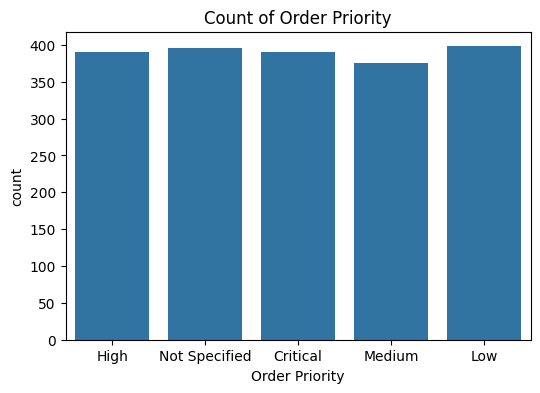

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Order Priority', data=data)
plt.title("Count of Order Priority")
plt.savefig("Count of order priority.png")
plt.show()

## Shipping Mode

In [23]:
data['Ship Mode'].value_counts()

Ship Mode
Regular Air       1437
Delivery Truck     275
Express Air        240
Name: count, dtype: int64

In [24]:
x=data['Ship Mode'].value_counts().index
y=data['Ship Mode'].value_counts().values

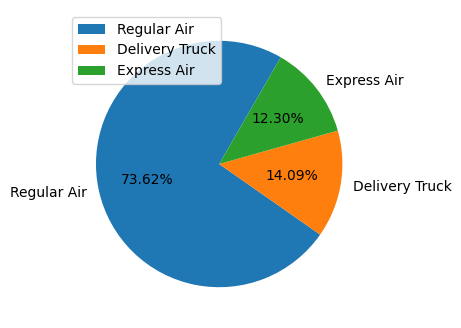

In [83]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct='%0.2f%%')
plt.legend(loc=2)
plt.savefig("Ship Mode.png")
plt.show()

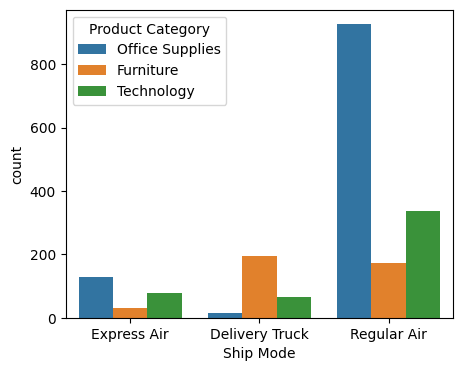

In [84]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode',data=data,hue='Product Category')
plt.savefig("Ship Mode Vs Product Category.png")
plt.show()

## Customer Segment

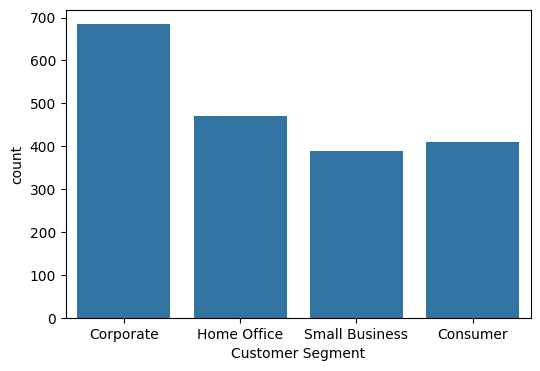

In [85]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer Segment',data=data)
plt.savefig("Customer Segment.png")
plt.show()

## Product Category

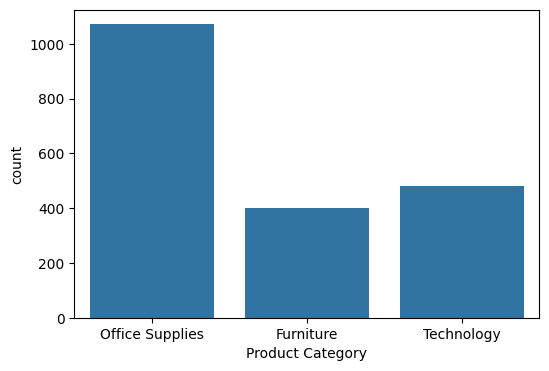

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=data)
plt.savefig("Product Category.png")
plt.show()

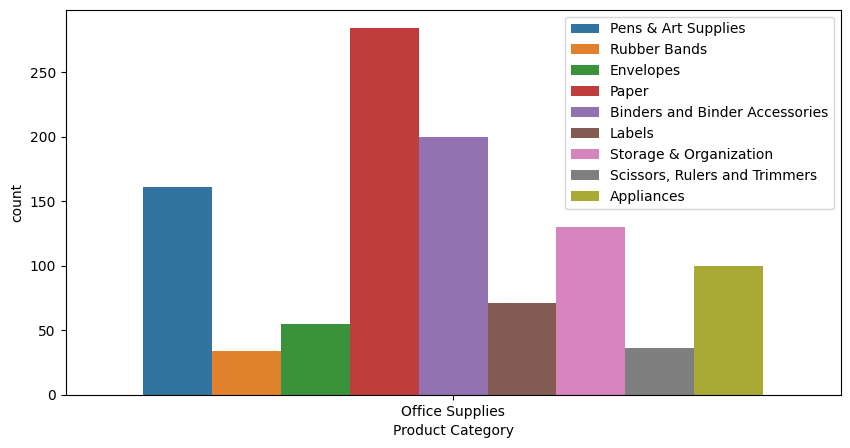

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product Category',data=data[data['Product Category']=='Office Supplies'],hue='Product Sub-Category')
plt.legend(loc=1)
plt.show()

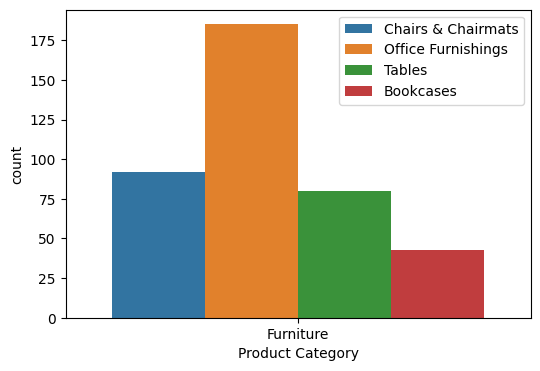

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=data[data['Product Category']=='Furniture'],hue='Product Sub-Category')
plt.legend(loc=1)
plt.show()

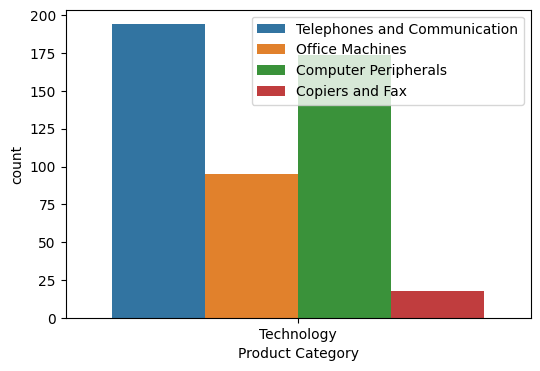

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(x='Product Category',data=data[data['Product Category']=='Technology'],hue='Product Sub-Category')
plt.legend(loc=1)
plt.show()

In [59]:
# Create new Column for Order year
data['Order Year'] = data['Order Date'].dt.year

In [61]:
data['Order Year'].value_counts()

Order Year
2015    1952
Name: count, dtype: int64

### How much profit based on each Category

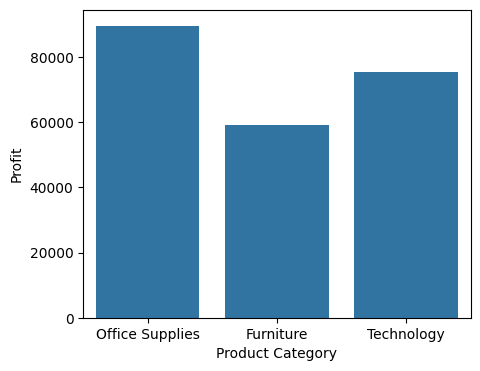

In [88]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category',y='Profit',data=data,estimator='sum',errorbar=('ci', 0))
plt.savefig("Product Category VS Profit.png")
plt.show()

### State

In [81]:
data['State or Province'].value_counts()[:5]

State or Province
California    214
New York      129
Texas         124
Florida       123
Illinois       88
Name: count, dtype: int64

## Product Base Margin 

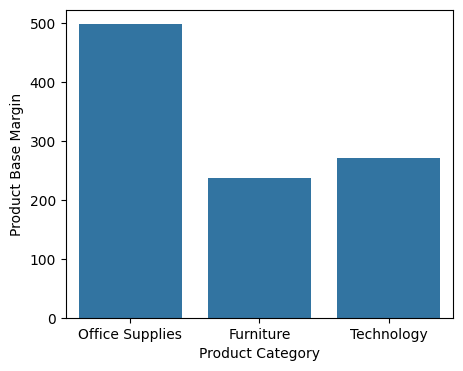

In [87]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category',y='Product Base Margin',data=data,estimator='sum',errorbar=('ci', 0))
plt.savefig("Product Category VS Product Base Margin.png")
plt.show()